### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [186]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

import sklearn
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

In [20]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# Explore the metadata.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
# Explore the data types
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [9]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [21]:
# Drop unnecessary columns.
reviews.drop(columns=['language', 'platform'], axis=1, inplace=True)

# View column names.
list(reviews)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [26]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
list(reviews)

['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

In [27]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv')

In [113]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')

# View DataFrame.
print(reviews.shape)
reviews.head()

(2000, 10)


,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [139]:
# Independent variable.
X = reviews["spending_score"]

# Dependent variable.
y = reviews["loyalty_points"]

# OLS model
f = 'y ~ X'
model_sl = ols(f, data = reviews).fit()

# View the output.
model_sl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          2.92e-263
Time:                        23:49:24   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# Extract the estimated parameters.
print("Parameters:\n", model_sl.params)

# Extract the standard errors.
print("Standard errors:\n", model_sl.bse)

# Extract the predicted values.
print("Predicted values:\n", model_sl.predict())

Parameters:
 Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:
 Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:
 [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [141]:
# Set the X coefficient and the constant to generate the regression table.
y_sl_pred = -75.0526 + 33.0617 * X

# View the output.
y_sl_pred

0       1214.3537
1       2602.9451
2        123.3176
3       2470.6983
4       1247.4154
          ...    
1995    2206.2047
1996     189.4410
1997    2933.5621
1998     453.9346
1999     189.4410
Name: spending_score, Length: 2000, dtype: float64

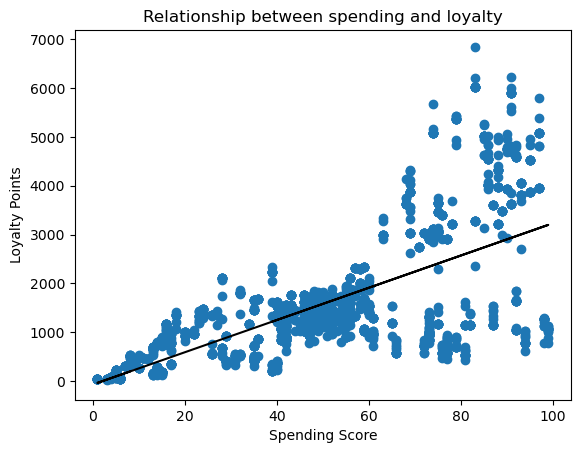

In [142]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the regression line.
plt.plot(X, y_sl_pred, color='black')

# Set Labels.
plt.title("Relationship between spending and loyalty")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

plt.show()

### 5b) remuneration vs loyalty

In [129]:
# Independent variable.
X = reviews["remuneration"]

# Dependent variable.
y = reviews["loyalty_points"]

# OLS model
f = 'y ~ X'
model_rl = ols(f, data = reviews).fit()

# View the output.
model_rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          2.43e-209
Time:                        23:45:49   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# Extract the estimated parameters.
print("Parameters:\n", model_rl.params)

# Extract the standard errors.
print("Standard errors:\n", model_rl.bse)

# Extract the predicted values.
print("Predicted values:\n", model_rl.predict())

Parameters:
 Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:
 Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:
 [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [131]:
# Set the X coefficient and the constant to generate the regression table.
y_rl_pred =  -65.6865 +  34.1878 * X

# View the output.
y_rl_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

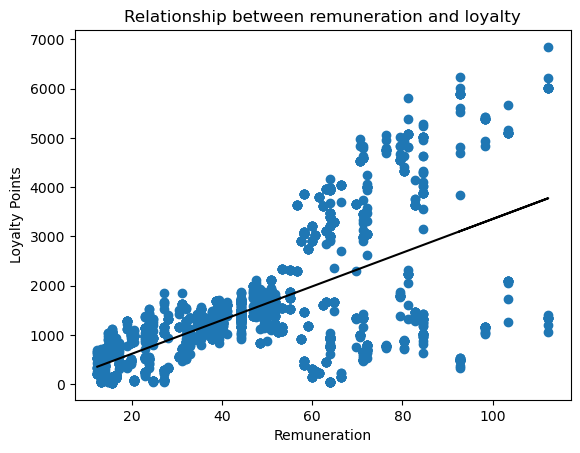

In [133]:
# Plot graph with regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the regression line.
plt.plot(X, y_rl_pred, color='black')

# Set Labels.
plt.title("Relationship between remuneration and loyalty")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

plt.show()

### 5c) age vs loyalty

In [122]:
# Independent variable.
X = reviews["age"]

# Dependent variable.
y = reviews["loyalty_points"]

# OLS model
f = 'y ~ X'
model_al = ols(f, data = reviews).fit()

# View the output.
model_al.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 07 Jun 2023   Prob (F-statistic):             0.0577
Time:                        23:39:01   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# Extract the estimated parameters.
print("Parameters:\n", model_al.params)

# Extract the standard errors.
print("Standard errors:\n", model_al.bse)

# Extract the predicted values.
print("Predicted values:\n", model_al.predict())

Parameters:
 Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:
 Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:
 [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [124]:
# Set the X coefficient and the constant to generate the regression table.
y_al_pred = 1736.5177 + -4.01281 * X

# View the output.
y_al_pred

0       1664.28712
1       1644.22307
2       1648.23588
3       1636.19745
4       1604.09497
           ...    
1995    1588.04373
1996    1563.96687
1997    1600.08216
1998    1600.08216
1999    1608.10778
Name: age, Length: 2000, dtype: float64

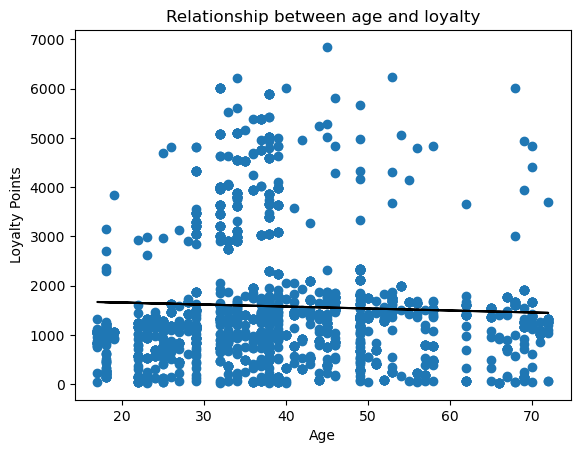

In [127]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the regression line.
plt.plot(X, y_al_pred, color='black')

# Set Labels.
plt.title("Relationship between age and loyalty")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

plt.show()

## (Extra) Testing multiple regression with spending and remuneration

In [190]:
# Independent variable.
X = reviews[["spending_score", "remuneration"]]

# Dependent variable.
y = reviews["loyalty_points"]

In [191]:
# Specify the model.
mlr_sr = linear_model.LinearRegression()  

# Fit the model.
mlr_sr.fit(X, y)

LinearRegression()

In [192]:
# Call the predictions for X (array).
mlr_sr.predict(X) 

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [193]:
# Print the R-squared value.
print("R-squared: ", multi.score(X,y))  

# Print the intercept.
print("Intercept: ", multi.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, multi.coef_))  

R-squared:  0.8269134701989259
Intercept:  -1700.305097014437
Coefficients:


[('spending_score', 32.89269468782097), ('remuneration', 33.97949882180285)]

### Training and testing subsets with MLR

In [194]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=6)

In [195]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     3716.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:10:19   Log-Likelihood:                -12327.
No. Observations:                1600   AIC:                         2.466e+04
Df Residuals:                    1597   BIC:                         2.468e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1706.4781     40.548    -42.

### Run a regression test

In [196]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(x_train, y_train) 

LinearRegression()

In [197]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [3394.0793759  1583.92785879 3179.18762222 ... 1086.21566866 1583.92785879
 1688.72651572]


In [198]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [ 1.30773959e+03  1.89966156e+03  2.70041642e+03  1.78784852e+03
  1.50183580e+03 -6.57536002e+02  2.38863943e+03  1.24153085e+03
  3.36097501e+03  1.54476463e+03  4.80894741e+02  2.70041642e+03
  1.41821490e+03  1.88639722e+03  3.33412060e+03  3.81952397e+03
  1.61192889e+03  1.39002276e+03  1.43977487e+03  1.82662954e+03
  1.54476463e+03  1.88167609e+03  1.67928426e+03 -7.45495817e+02
  1.17532211e+03  3.42246262e+03 -1.12523414e+00  1.88167609e+03
  1.37394834e+03  5.62413489e+02  3.39407938e+03  2.11927444e+03
  1.41783269e+03 -1.08240728e+03 -4.69689761e+02  1.08678898e+03
  1.38472832e+03  2.31885619e+03  2.11927444e+03  3.44364038e+03
  1.08621567e+03 -4.69689761e+02  1.38925834e+03  1.34084396e+03
  1.82114400e+03  3.60935334e+03  1.68872652e+03  1.76132127e+02
  2.86989499e+03  1.88167609e+03  4.82496391e+03  1.03155133e+03
  1.67928426e+03  1.99782805e+03  1.16396881e+03  1.27897414e+03
  3.27263298e+03  1.28031187e+03  4.75218092e+02  1.41783269e+03


In [199]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)  

84.06953519248843


### Check for multicollinearity

In [200]:
# Check multicollinearity.
x_temp = sm.add_constant(X)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0         9.0           const
1         1.0  spending_score
2         1.0    remuneration


In [201]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [202]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 42.08865372149155, 'LM Test p-value': 7.253789842578924e-10, 'F-stat': 21.57233791055713, 'F-test p-value': 5.696026162897933e-10}


### Evaluate the model

In [203]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 409.026047281403
Mean Square Error (Final): 273777.7984963155


## Observations and insights

Significant evidence to suggest relationship between spending and loyalty (p<0.05), CI did not have 0.
R-Squared tells us relationship between spending and loyalty explains 45.2% of the variance.
The coefficient value of 33.0617 tells us that as spending_score increases by 1, the predicted value of loyalty_points increases by 33.0617.

Significant evidence to suggest relationship between remuneration and loyalty (p<0.05), CI did not have 0.
R-Squared tells us relationship between spending and loyalty explains 38.0% of the variance.
The coefficient value of 33.0617 tells us that as remuneration increases by 1, the predicted value of loyalty_points increases by 34.1878.

Insignificant evidence to suggest relationship between age and loyalty (p>0.05), CI had 0.

*Created Multiple Regression model with spending_score and remuneration using MLR:*\
Significant evidence to suggest relationship between remuneration and loyalty (p<0.05), CI did not have 0.
R-Squared tells us that the MLR model of multiple regression explains 82.3% of the variance.
There is insignificant evidence to suggest multicollinearity


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as df2.


# View DataFrame.


In [ ]:
# Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Explore the data.


In [ ]:
# Descriptive statistics.


## 2. Plot

In [ ]:
# Create a scatterplot with Seaborn.


In [ ]:
# Create a pairplot with Seaborn.


## 3. Elbow and silhoutte methods

In [ ]:
# Determine the number of clusters: Elbow method.


In [ ]:
# Determine the number of clusters: Silhouette method.


## 4. Evaluate k-means model at different values of *k*

## 5. Fit final model and justify your choice

In [ ]:
# Apply the final model.


In [ ]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

In [ ]:
# Visualising the clusters.


# View the DataFrame.


In [ ]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenisation to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 